# Decision Tree Regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import export_text

In [27]:
data = pd.read_csv('../data/housing.csv')
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
#Initialize the decision tree
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [33]:
#Make and display some predictions 
y_pred = regressor.predict(X_test)
print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5].values)

Predicted values: [732175.         370762.17948718 732175.         545333.33333333
 377751.61290323]
Actual values: [577500 343000 560000 980000 367500]


In [35]:
#Display measures of goodness of fit
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 24555359820.71353
R-squared: 0.4214800168168742


In [37]:
tree_rules = export_text(regressor, feature_names=['square footage', 'bedrooms', 'bathrooms', 'stories'])
print(tree_rules)

|--- square footage <= 5992.50
|   |--- bathrooms <= 1.50
|   |   |--- square footage <= 4016.00
|   |   |   |--- stories <= 1.50
|   |   |   |   |--- value: [302219.75]
|   |   |   |--- stories >  1.50
|   |   |   |   |--- value: [370762.18]
|   |   |--- square footage >  4016.00
|   |   |   |--- bedrooms <= 2.50
|   |   |   |   |--- value: [377751.61]
|   |   |   |--- bedrooms >  2.50
|   |   |   |   |--- value: [451199.22]
|   |--- bathrooms >  1.50
|   |   |--- square footage <= 4535.00
|   |   |   |--- bedrooms <= 2.50
|   |   |   |   |--- value: [358960.00]
|   |   |   |--- bedrooms >  2.50
|   |   |   |   |--- value: [478573.53]
|   |   |--- square footage >  4535.00
|   |   |   |--- square footage <= 4580.00
|   |   |   |   |--- value: [864500.00]
|   |   |   |--- square footage >  4580.00
|   |   |   |   |--- value: [614268.42]
|--- square footage >  5992.50
|   |--- bathrooms <= 1.50
|   |   |--- bedrooms <= 2.50
|   |   |   |--- square footage <= 8640.00
|   |   |   |   |---

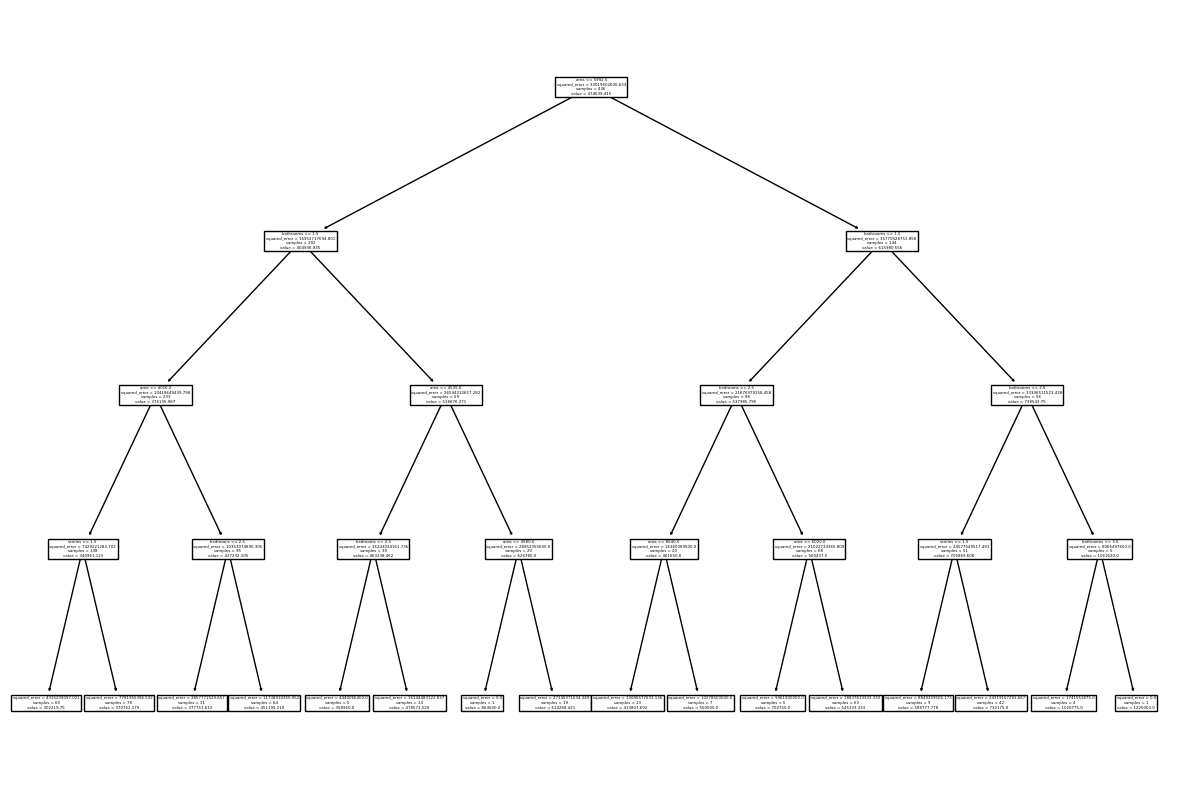

In [39]:
#Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(regressor, feature_names=['area', 'bedrooms', 'bathrooms', 'stories'])
plt.show()